In [ ]:
# library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# postgreSQL to python
import pandas.io.sql as psql
import psycopg2 as pg

with pg.connect(database='Retail',

                user='postgres',

                host='localhost',

                password = '2336',

                port=5432) as conn:

  sql = 'SELECT * FROM city'

  df = psql.read_sql(sql, conn)

In [ ]:
print(df)

  city_code city_name
0         4      Jeju
1         8    Sejong
2         2   Daejeon
3         1     Busan
4         5     Seoul
5         9   Gwangju
6         7     Deagu
7        10   Incheon
8         6     Ulsan
9         3   Gangwon


In [ ]:
query = """SELECT	concat(pci.prod_cat, ':', pci.prod_sub_cat)		AS "카테고리"
	,	count(DISTINCT t.customer_id)					AS "주문고객수"
	,	count(DISTINCT t.transaction_id)				AS "주문건수"
	,	sum(t.total_amt)								AS "매출액"
FROM	transactions AS t
JOIN
		prod_cat_info AS pci
ON		t.prod_cat_code = pci.prod_cat_code
AND		t.prod_sub_cat_code = pci.prod_sub_cat_code
WHERE	to_char(t.tran_date, 'yyyy') = '2019'
GROUP BY
		1"""

In [ ]:
df = psql.read_sql(query, conn)
df.head()

카테고리  주문고객수  주문건수         매출액
0       Bags:Mens    303   311  30998440.0
1      Bags:Women    273   282  29445230.0
2  Books:Academic    280   287  31001510.0
3  Books:Children    260   266  26321310.0
4    Books:Comics    279   286  26995960.0

In [ ]:
# percentage 추가
df['주문고객수비중'] = [i*100/sum(df['주문고객수']) for i in df['주문고객수']]
df['주문건수비중'] = [i*100/sum(df['주문건수']) for i in df['주문건수']]
df['매출비중'] = [i*100/sum(df['매출액']) for i in df['매출액']]
df.head()

카테고리  주문고객수  주문건수         매출액   주문고객수비중    주문건수비중      매출비중
0       Bags:Mens    303   311  30998440.0  4.568069  4.576221  4.438813
1      Bags:Women    273   282  29445230.0  4.115785  4.149500  4.216402
2  Books:Academic    280   287  31001510.0  4.221318  4.223072  4.439253
3  Books:Children    260   266  26321310.0  3.919795  3.914067  3.769073
4    Books:Comics    279   286  26995960.0  4.206242  4.208358  3.865679

In [ ]:
# 정렬된 데이터 프레임 (매출액 기준))
df_s = df.sort_values(by = '매출액', ascending = False)
df_s = df_s.reset_index(drop=True)
df_s.head()

카테고리  주문고객수  주문건수         매출액   주문고객수비중    주문건수비중  \
0  Electronics:Audio and video    293   301  33493530.0  4.417307  4.429076   
1                    Books:DIY    298   306  33306380.0  4.492688  4.502649   
2     Home and kitchen:Kitchen    294   305  32599580.0  4.432384  4.487934   
3               Clothing:Women    322   326  32453860.0  4.854515  4.796939   
4  Home and kitchen:Furnishing    295   303  32080250.0  4.447460  4.458505   

       매출비중  
0  4.796097  
1  4.769298  
2  4.668088  
3  4.647222  
4  4.593723

In [ ]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    f_path = "/Users/geonseunglee/Library/Fonts/NanumBarunGothicBold.ttf"
elif platform.system() == 'Windows':
    f_path = "c:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

print("Hangul font is set!")

Hangul font is set!


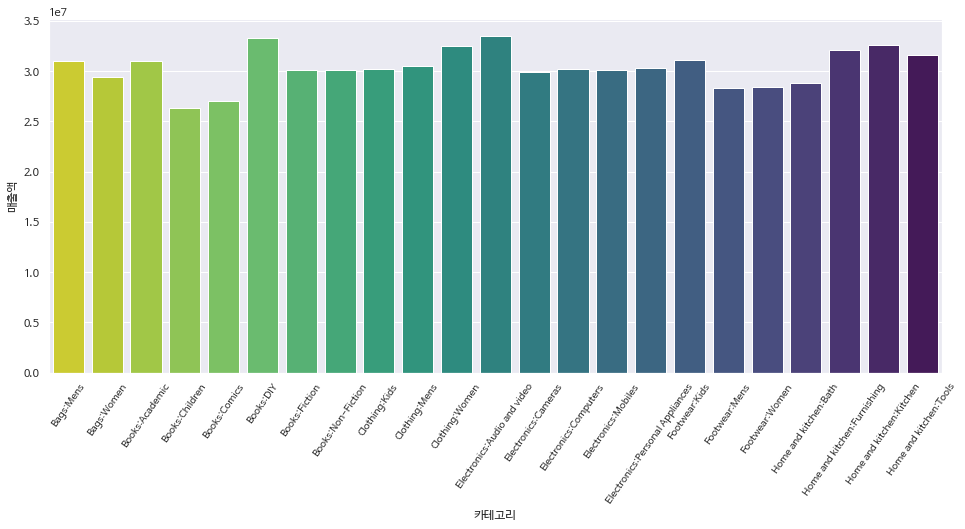

In [ ]:
# bar plot
plt.rcParams["figure.figsize"] = (16, 6.5)
sns.set_style('darkgrid')
sns.set(font = font_name)
g = sns.barplot(data=df, x='카테고리', y='매출액',
                ci=False, palette='viridis_r')
g.set_xticklabels(df['카테고리'], rotation=55, fontdict={'fontsize':10})
plt.show()

In [ ]:
# 시각화에 사용할 수 있도록 색상 목록을 추출하는 function 정의
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

In [ ]:
# apply the function to get a list of colors
pal_vi = get_color('viridis_r', len(df))
pal_plas = get_color('plasma_r', len(df))
pal_spec = get_color('Spectral', len(df))
pal_hsv = get_color('hsv', len(df))

In [ ]:
print(pal_vi)

['#e5e419', '#c8e020', '#aadc32', '#90d743', '#75d054', '#5cc863', '#48c16e', '#35b779', '#27ad81', '#20a486', '#1f9a8a', '#21908d', '#24868e', '#287c8e', '#2c718e', '#31688e', '#365d8d', '#3b518b', '#404688', '#443983', '#472c7a', '#481f70', '#471063']


In [ ]:
# 레이더 차트
# plot a radar chart with the Data.frame

import plotly.express as px
fig = px.line_polar(df, r='매출액',
                    theta='카테고리', line_close=True)
fig.update_traces(fill='toself', line = dict(color=pal_spec[5]))
fig.show()

In [ ]:
# Plot a radar chart with the sorted DataFrame.

import plotly.express as px
fig = px.line_polar(df_s, r='매출액',
                    theta='카테고리', line_close=True)
fig.update_traces(fill='toself', line = dict(color=pal_spec[5]))
fig.show()

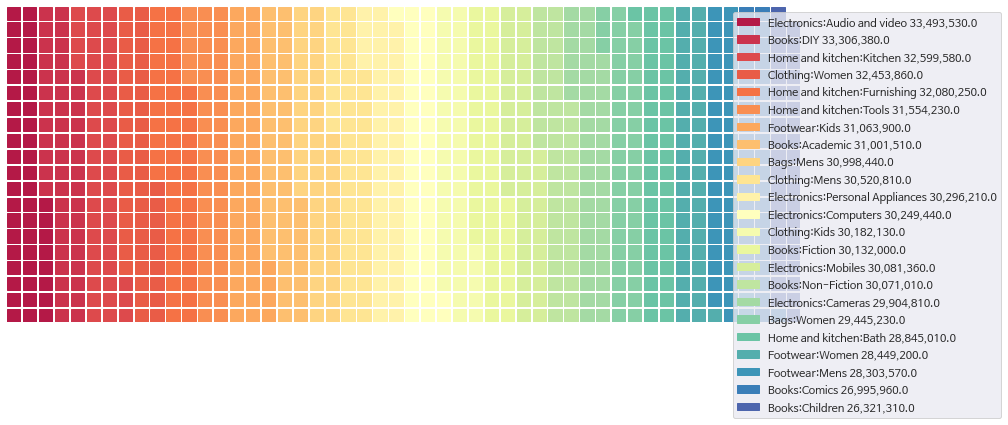

In [ ]:
# 와플 차트
#!pip install pywaffle
from pywaffle import Waffle
fig = plt.figure(FigureClass=Waffle,
                 rows=20,
                 columns=50,
                 values=list(df_s['매출액']),
                 colors=pal_spec,
                 labels=[i+' '+format(j, ',') for i,j in zip(df_s['카테고리'], df_s['매출액'])],
                 figsize = (15,6),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.26, 1)
                        })
plt.tight_layout()
plt.show()

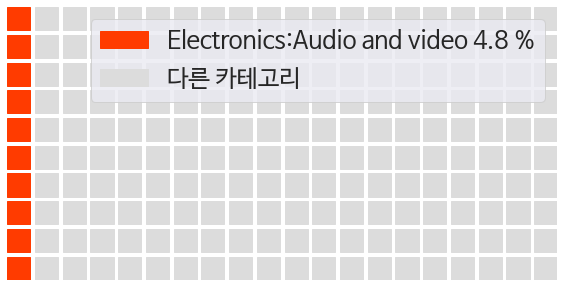

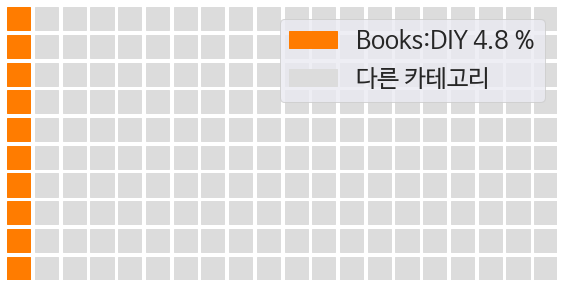

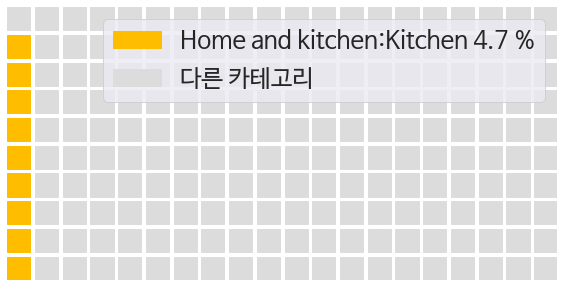

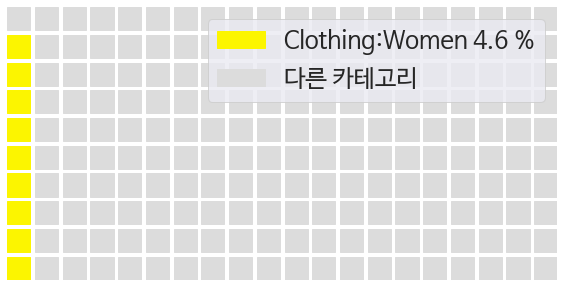

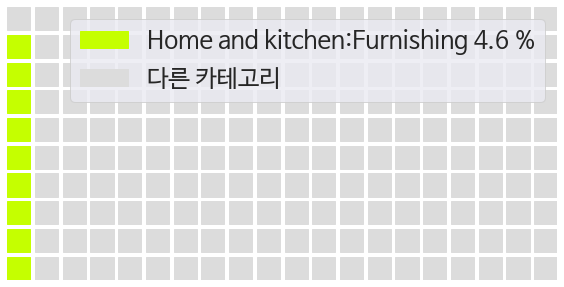

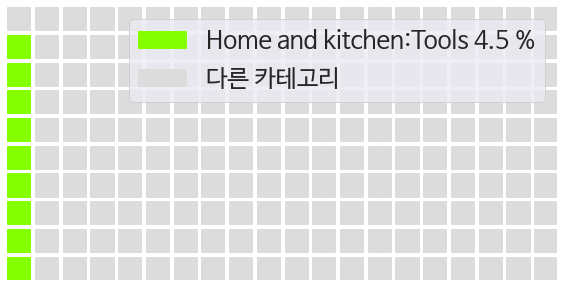

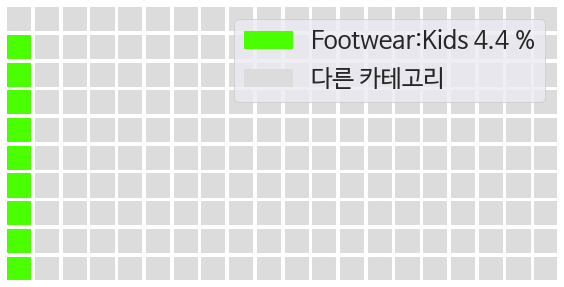

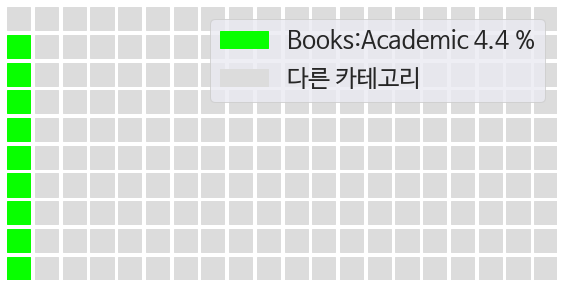

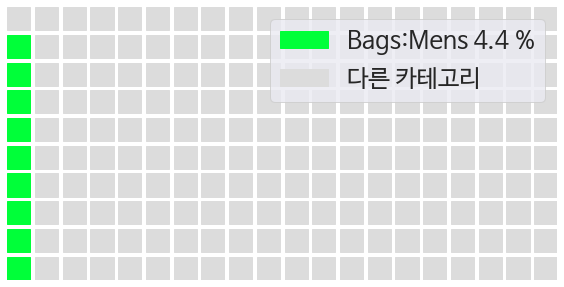

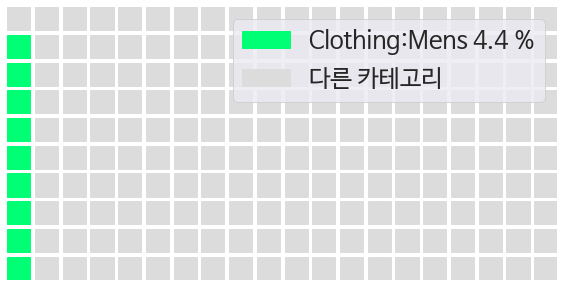

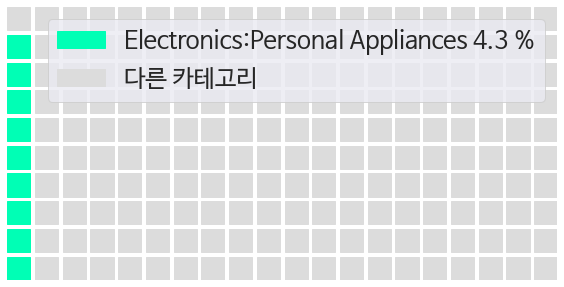

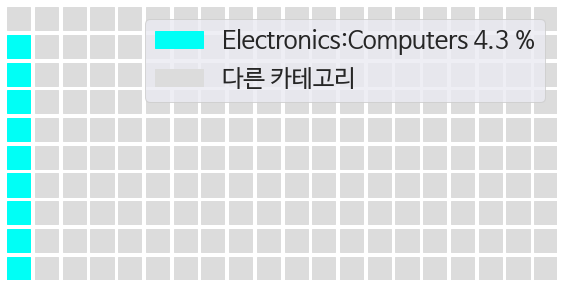

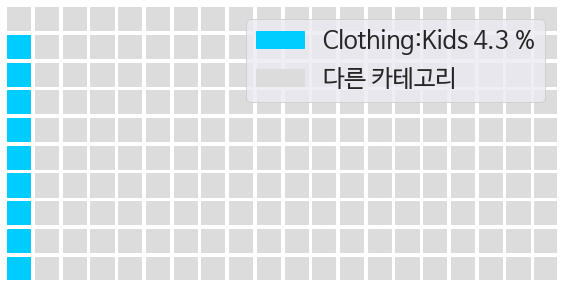

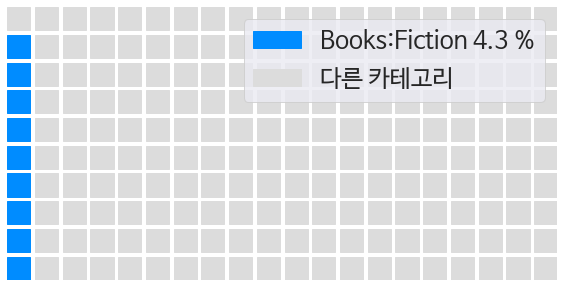

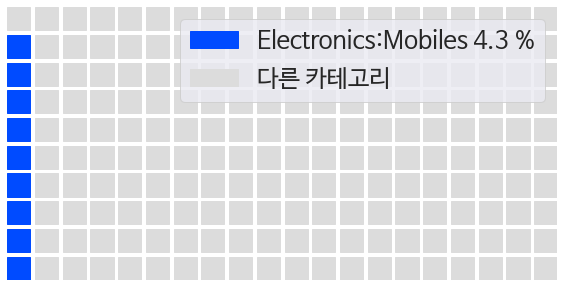

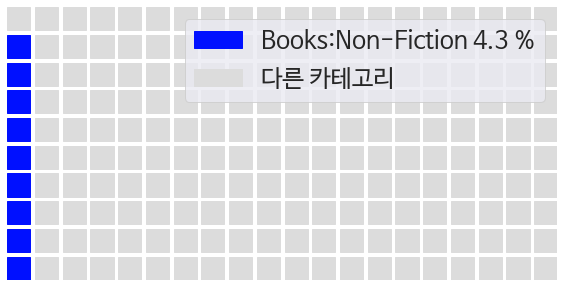

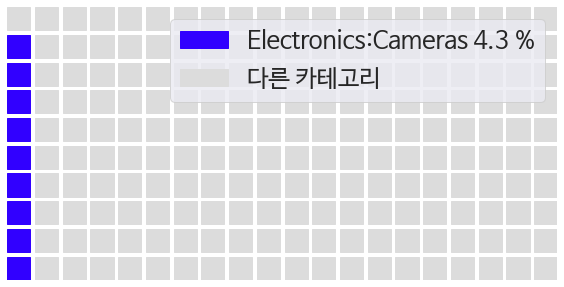

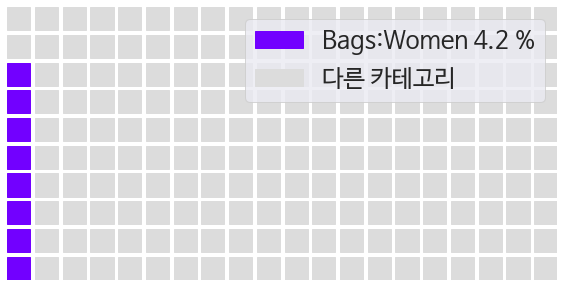

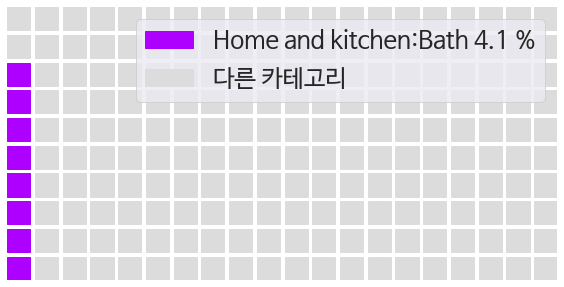

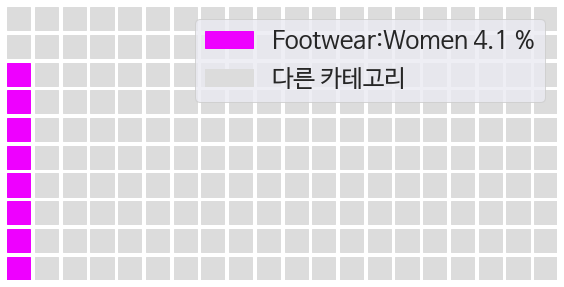

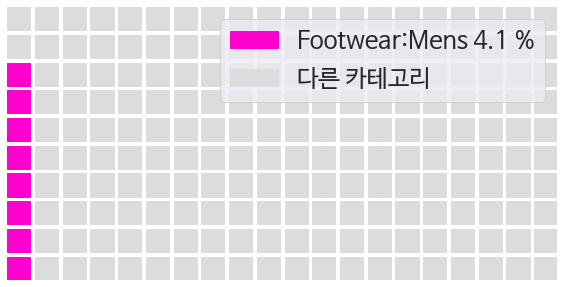

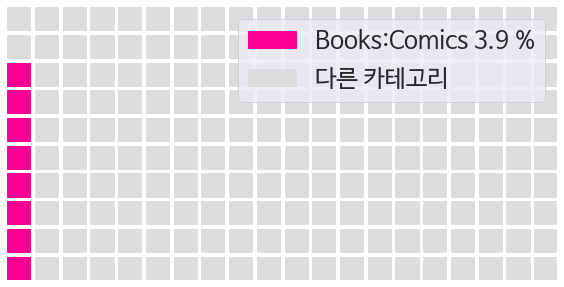

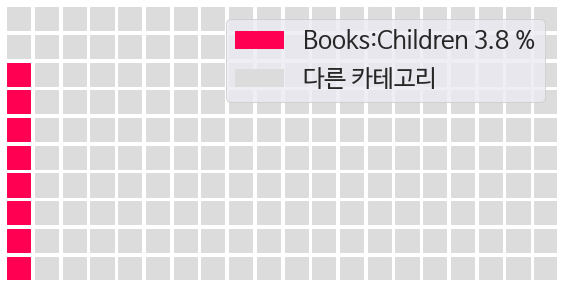

In [ ]:
# 각 카테고리별 와플차트
save_name = []
for i,p,n,c in zip(df_s['매출액'], df_s['매출비중'], df_s['카테고리'], pal_hsv):
    fig = plt.figure(FigureClass=Waffle,
                     rows=10, columns=20,
                     values=[i, sum(df_s['매출액'])-i],
                     colors=[c,'gainsboro'],
                     labels=[n + ' ' + str(round(p,1)) +' %','다른 카테고리'],
                     figsize = (8,8),
                     legend={'loc':'upper right', 'bbox_to_anchor': (1, 1), 'fontsize':24}
                    )
    save_name.append('waffle_'+ n + '.png')
    plt.tight_layout()
    plt.savefig('waffle_'+ n + '.png', bbox_inches='tight')   #export_fig
    plt.show()

In [ ]:
# 파일로 저장하기
from PIL import Image
def get_collage(cols_n, rows_n, width, height, input_sname, save_name):
    c_width = width//cols_n
    c_height = height//rows_n
    size = c_width, c_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in input_sname:
        im = Image.open(p)
        im.thumbnail(size)
        ims.append(im)
    i, x, y = 0,0,0

    for col in range(cols_n):
        for row in range(rows_n):
            print(i, x, y)
            try:
                new_im.paste(ims[i], (x, y))
                i += 1
                y += c_height
            except IndexError:
                pass
        x += c_width
        y = 0
    new_im.save(save_name)

In [ ]:
# to create a fit photo collage:
# width = number of columns * figure width
# height = number of rows * figure height
get_collage(5, 5, 2840, 1445, save_name, 'Collage_waffle.png')

0 0 0
1 0 289
2 0 578
3 0 867
4 0 1156
5 568 0
6 568 289
7 568 578
8 568 867
9 568 1156
10 1136 0
11 1136 289
12 1136 578
13 1136 867
14 1136 1156
15 1704 0
16 1704 289
17 1704 578
18 1704 867
19 1704 1156
20 2272 0
21 2272 289
22 2272 578
23 2272 867
23 2272 867


In [ ]:
# interactive chart with bar plot
import plotly.express as px
fig = px.bar(df, x='카테고리', y='매출액', text='매출액',
             color ='카테고리', color_discrete_sequence=pal_vi)

fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})

fig.update_layout(width=1100, height=500,
                  margin = dict(t=15, l=15, r=15, b=15))
fig.show()

In [ ]:
# pie chart
import plotly.express as px
fig = px.pie(df_s, values='매출액', names='카테고리',
             color ='카테고리', color_discrete_sequence=pal_vi)
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  sort=False)
fig.update_layout(width=1000, height=550)
fig.show()

In [ ]:
# Using many circles with a Bubble chart
#X-axis and Y-axis column
df_s['X'] = [1]*len(df_s)
list_y = list(range(0,len(df_s)))
list_y.reverse()
df_s['Y'] = list_y

#labels column
df_s['labels'] = ['<b>'+i+'<br>'+format(j, ",") for i,j in zip(df_s['카테고리'], df_s['매출액'])]
df_s

카테고리  주문고객수  주문건수         매출액   주문고객수비중  \
0       Electronics:Audio and video    293   301  33493530.0  4.417307   
1                         Books:DIY    298   306  33306380.0  4.492688   
2          Home and kitchen:Kitchen    294   305  32599580.0  4.432384   
3                    Clothing:Women    322   326  32453860.0  4.854515   
4       Home and kitchen:Furnishing    295   303  32080250.0  4.447460   
5            Home and kitchen:Tools    311   322  31554230.0  4.688678   
6                     Footwear:Kids    293   303  31063900.0  4.417307   
7                    Books:Academic    280   287  31001510.0  4.221318   
8                         Bags:Mens    303   311  30998440.0  4.568069   
9                     Clothing:Mens    291   299  30520810.0  4.387155   
10  Electronics:Personal Appliances    275   282  30296210.0  4.145937   
11            Electronics:Computers    280   284  30249440.0  4.221318   
12                    Clothing:Kids    288   296  30182130.0  4.341927   
13                    Books:Fiction    291   295  30132000.0  4.387155   
14              Electronics:Mobiles    291   296  30081360.0  4.387155   
15                Books:Non-Fiction    273   278  30071010.0  4.115785   
16              Electronics:Cameras    281   286  29904810.0  4.236394   
17                       Bags:Women    273   282  29445230.0  4.115785   
18            Home and kitchen:Bath    298   303  28845010.0  4.492688   
19                   Footwear:Women    293   301  28449200.0  4.417307   
20                    Footwear:Mens    271   278  28303570.0  4.085632   
21                     Books:Comics    279   286  26995960.0  4.206242   
22                   Books:Children    260   266  26321310.0  3.919795   

      주문건수비중      매출비중  X   Y  \
0   4.429076  4.796097  1  22   
1   4.502649  4.769298  1  21   
2   4.487934  4.668088  1  20   
3   4.796939  4.647222  1  19   
4   4.458505  4.593723  1  18   
5   4.738081  4.518399  1  17   
6   4.458505  4.448187  1  16   
7   4.223072  4.439253  1  15   
8   4.576221  4.438813  1  14   
9   4.399647  4.370419  1  13   
10  4.149500  4.338258  1  12   
11  4.178929  4.331560  1  11   
12  4.355503  4.321922  1  10   
13  4.340789  4.314744  1   9   
14  4.355503  4.307492  1   8   
15  4.090642  4.306010  1   7   
16  4.208358  4.282211  1   6   
17  4.149500  4.216402  1   5   
18  4.458505  4.130453  1   4   
19  4.429076  4.073775  1   3   
20  4.090642  4.052922  1   2   
21  4.208358  3.865679  1   1   
22  3.914067  3.769073  1   0   

                                               labels  
0      <b>Electronics:Audio and video<br>33,493,530.0  
1                        <b>Books:DIY<br>33,306,380.0  
2         <b>Home and kitchen:Kitchen<br>32,599,580.0  
3                   <b>Clothing:Women<br>32,453,860.0  
4      <b>Home and kitchen:Furnishing<br>32,080,250.0  
5           <b>Home and kitchen:Tools<br>31,554,230.0  
6                    <b>Footwear:Kids<br>31,063,900.0  
7                   <b>Books:Academic<br>31,001,510.0  
8                        <b>Bags:Mens<br>30,998,440.0  
9                    <b>Clothing:Mens<br>30,520,810.0  
10  <b>Electronics:Personal Appliances<br>30,296,2...  
11           <b>Electronics:Computers<br>30,249,440.0  
12                   <b>Clothing:Kids<br>30,182,130.0  
13                   <b>Books:Fiction<br>30,132,000.0  
14             <b>Electronics:Mobiles<br>30,081,360.0  
15               <b>Books:Non-Fiction<br>30,071,010.0  
16             <b>Electronics:Cameras<br>29,904,810.0  
17                      <b>Bags:Women<br>29,445,230.0  
18           <b>Home and kitchen:Bath<br>28,845,010.0  
19                  <b>Footwear:Women<br>28,449,200.0  
20                   <b>Footwear:Mens<br>28,303,570.0  
21                    <b>Books:Comics<br>26,995,960.0  
22                  <b>Books:Children<br>26,321,310.0

In [ ]:
# Plot a vertical bubble chart
import plotly.express as px
fig = px.scatter(df_s, x='X', y='Y',
                 color='카테고리', color_discrete_sequence=pal_vi,
                 size='매출액', text='labels', size_max=30)

fig.update_layout(width=500, height=1100,
                  margin = dict(t=0, l=0, r=0, b=0),
                  showlegend=False
                 )

fig.update_traces(textposition='middle right')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)

fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

In [ ]:
#create X and Y coordinates in a circle
import math
e = 360/len(df)
degree = [i*e for i in list(range(len(df)))]
df_s['X_coor'] = [math.cos(i*math.pi/180) for i in degree]
df_s['Y_coor'] = [math.sin(i*math.pi/180) for i in degree]
df_s

카테고리  주문고객수  주문건수         매출액   주문고객수비중  \
0       Electronics:Audio and video    293   301  33493530.0  4.417307   
1                         Books:DIY    298   306  33306380.0  4.492688   
2          Home and kitchen:Kitchen    294   305  32599580.0  4.432384   
3                    Clothing:Women    322   326  32453860.0  4.854515   
4       Home and kitchen:Furnishing    295   303  32080250.0  4.447460   
5            Home and kitchen:Tools    311   322  31554230.0  4.688678   
6                     Footwear:Kids    293   303  31063900.0  4.417307   
7                    Books:Academic    280   287  31001510.0  4.221318   
8                         Bags:Mens    303   311  30998440.0  4.568069   
9                     Clothing:Mens    291   299  30520810.0  4.387155   
10  Electronics:Personal Appliances    275   282  30296210.0  4.145937   
11            Electronics:Computers    280   284  30249440.0  4.221318   
12                    Clothing:Kids    288   296  30182130.0  4.341927   
13                    Books:Fiction    291   295  30132000.0  4.387155   
14              Electronics:Mobiles    291   296  30081360.0  4.387155   
15                Books:Non-Fiction    273   278  30071010.0  4.115785   
16              Electronics:Cameras    281   286  29904810.0  4.236394   
17                       Bags:Women    273   282  29445230.0  4.115785   
18            Home and kitchen:Bath    298   303  28845010.0  4.492688   
19                   Footwear:Women    293   301  28449200.0  4.417307   
20                    Footwear:Mens    271   278  28303570.0  4.085632   
21                     Books:Comics    279   286  26995960.0  4.206242   
22                   Books:Children    260   266  26321310.0  3.919795   

      주문건수비중      매출비중  X   Y  \
0   4.429076  4.796097  1  22   
1   4.502649  4.769298  1  21   
2   4.487934  4.668088  1  20   
3   4.796939  4.647222  1  19   
4   4.458505  4.593723  1  18   
5   4.738081  4.518399  1  17   
6   4.458505  4.448187  1  16   
7   4.223072  4.439253  1  15   
8   4.576221  4.438813  1  14   
9   4.399647  4.370419  1  13   
10  4.149500  4.338258  1  12   
11  4.178929  4.331560  1  11   
12  4.355503  4.321922  1  10   
13  4.340789  4.314744  1   9   
14  4.355503  4.307492  1   8   
15  4.090642  4.306010  1   7   
16  4.208358  4.282211  1   6   
17  4.149500  4.216402  1   5   
18  4.458505  4.130453  1   4   
19  4.429076  4.073775  1   3   
20  4.090642  4.052922  1   2   
21  4.208358  3.865679  1   1   
22  3.914067  3.769073  1   0   

                                               labels    X_coor    Y_coor  
0      <b>Electronics:Audio and video<br>33,493,530.0  1.000000  0.000000  
1                        <b>Books:DIY<br>33,306,380.0  0.962917  0.269797  
2         <b>Home and kitchen:Kitchen<br>32,599,580.0  0.854419  0.519584  
3                   <b>Clothing:Women<br>32,453,860.0  0.682553  0.730836  
4      <b>Home and kitchen:Furnishing<br>32,080,250.0  0.460065  0.887885  
5           <b>Home and kitchen:Tools<br>31,554,230.0  0.203456  0.979084  
6                    <b>Footwear:Kids<br>31,063,900.0 -0.068242  0.997669  
7                   <b>Books:Academic<br>31,001,510.0 -0.334880  0.942261  
8                        <b>Bags:Mens<br>30,998,440.0 -0.576680  0.816970  
9                    <b>Clothing:Mens<br>30,520,810.0 -0.775711  0.631088  
10  <b>Electronics:Personal Appliances<br>30,296,2... -0.917211  0.398401  
11           <b>Electronics:Computers<br>30,249,440.0 -0.990686  0.136167  
12                   <b>Clothing:Kids<br>30,182,130.0 -0.990686 -0.136167  
13                   <b>Books:Fiction<br>30,132,000.0 -0.917211 -0.398401  
14             <b>Electronics:Mobiles<br>30,081,360.0 -0.775711 -0.631088  
15               <b>Books:Non-Fiction<br>30,071,010.0 -0.576680 -0.816970  
16             <b>Electronics:Cameras<br>29,904,810.0 -0.334880 -0.942261  
17                      <b>Bags:Women<br>29,445,230.0 -0.068242 -0.997669  
18           <b>H

In [ ]:
# Plot the bubbles in a circular direction
import plotly.express as px
fig = px.scatter(df_s, x='X_coor', y='Y_coor',
                 color="카테고리", color_discrete_sequence=pal_vi,
                 size='매출액', text='labels', size_max=40)
fig.update_layout(width=800, height=800,
                  margin = dict(t=0, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='bottom center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)

fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

In [ ]:
# Clustering the bubbles with Circle packing
import circlify
# compute circle positions:
circles = circlify.circlify(df_s['매출액'].tolist(),
                            show_enclosure=False,
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

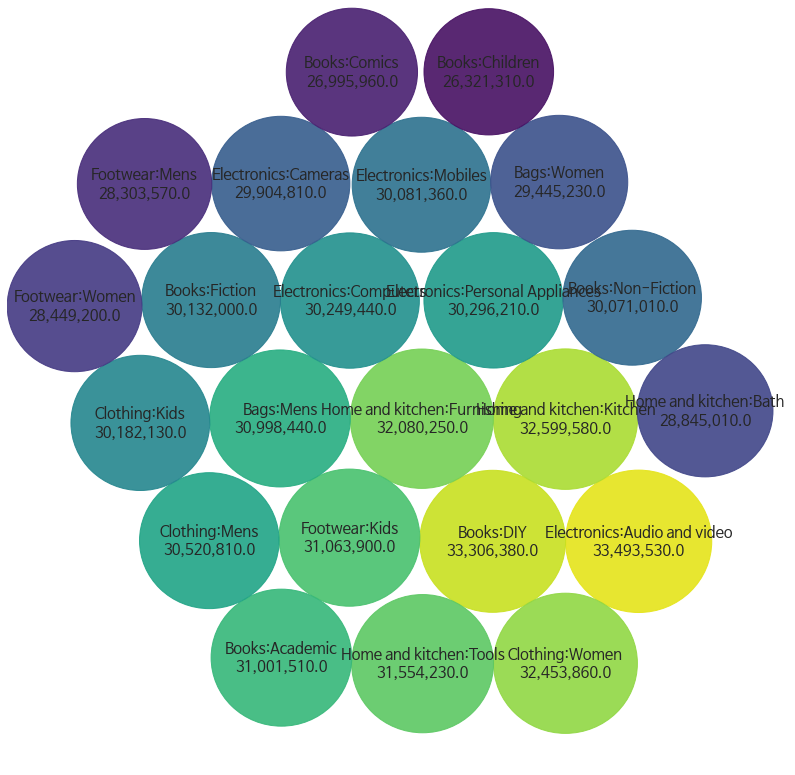

In [ ]:
# Plot the circle packing
fig, ax = plt.subplots(figsize=(14, 14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, label, emi, color in zip(circles, df_s['카테고리'], df_s['매출액'], pal_vi):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=15, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#  Using area for comparing with Treemap

import plotly.express as px
fig = px.treemap(df, path=[px.Constant('카테고리'), '카테고리'],
                 values=df['매출액'],
                 color=df['매출액'],
                 color_continuous_scale='Spectral_r',
                 color_continuous_midpoint=np.average(df['매출액'])
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

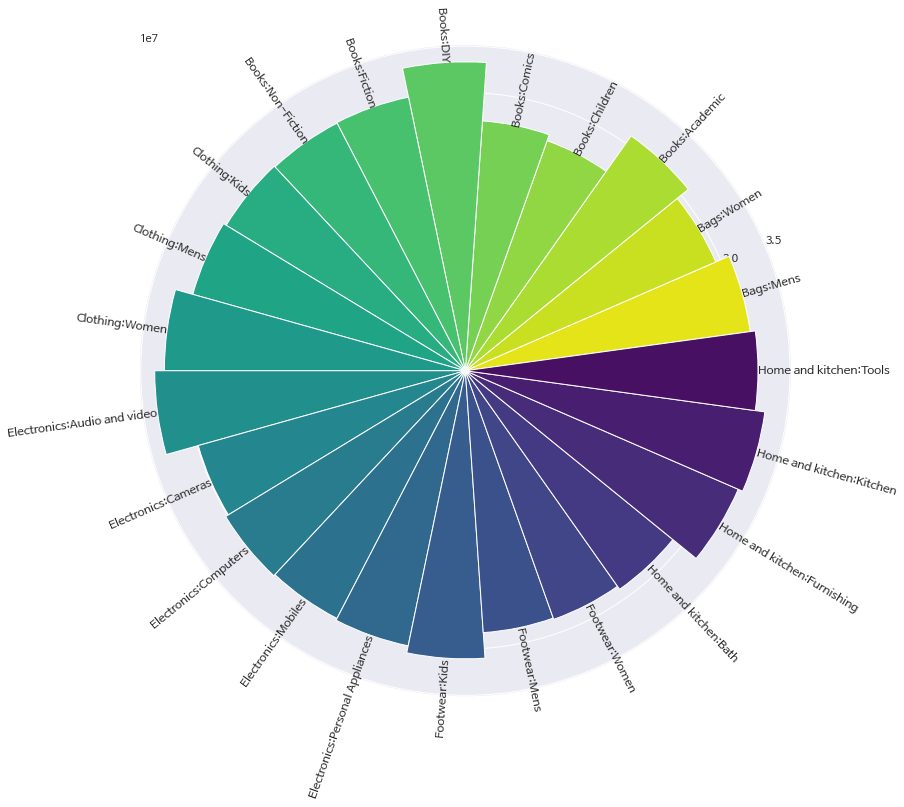

In [ ]:
# Starting from the center with a Radial bar chart
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df['매출액'].max()

#set heights and width
heights = df['매출액']
width = 2*np.pi / len(df.index)

#set index and angle
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_vi)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df['카테고리']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation,
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

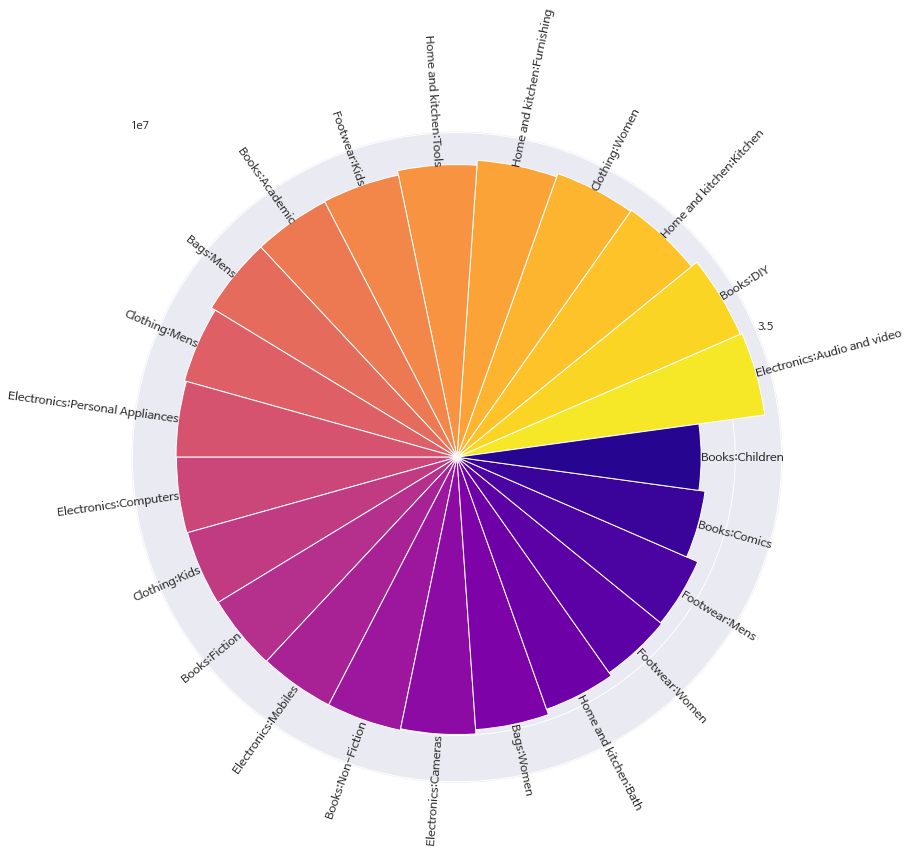

In [ ]:
# Plot a radial bar chart with the sorted DataFrame
plt.figure(figsize=(12,12))
ax = plt.subplot(111, polar=True)
plt.axis()

#set min and max value
lowerLimit = 0
max_v = df_s['매출액'].max()

#set heights and width
heights = df_s['매출액']
width = 2*np.pi / len(df_s.index)

#set index and angle
indexes = list(range(1, len(df_s.index)+1))
angles = [element * width for element in indexes]

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=pal_plas)
labelPadding = 15

for bar, angle, height, label in zip(bars,angles, heights, df_s['카테고리']):
    rotation = np.rad2deg(angle)
    alignment = ""
    #deal with alignment
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation,
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])
plt.show()

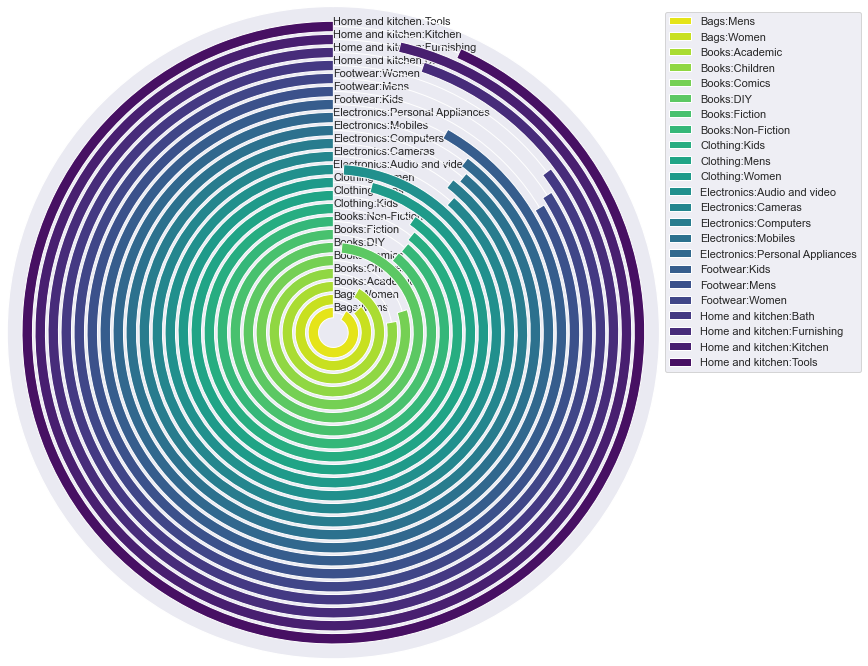

In [ ]:
# Changing the direction with a Circular bar chart (aka Race track plot)

import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df['매출액'])*1.01
ax = plt.subplot(projection='polar')

#set the subplot
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df['카테고리'])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df['매출액'])[i]*2*np.pi/max_val,
            label=list(df['카테고리'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

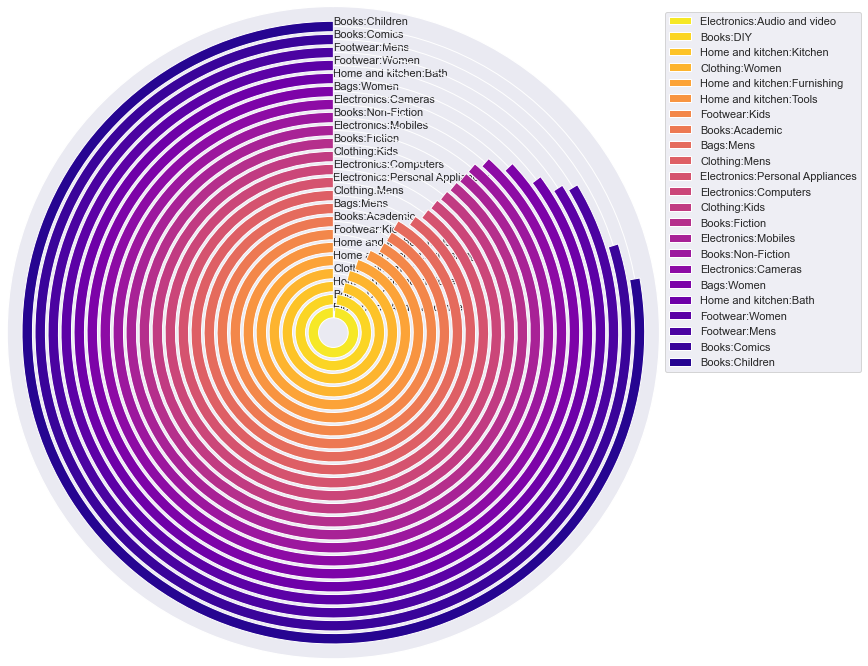

In [ ]:
# Plot a circular bar chart with the sorted DataFrame
import math
plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(df_s['매출액'])*1.01
ax = plt.subplot(projection='polar')

for i in range(len(df)):
    ax.barh(i, list(df_s['매출액'])[i]*2*np.pi/max_val,
            label=list(df_s['카테고리'])[i], color=pal_plas[i])

#set the subplot
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids(range(len(df)), labels= df_s['카테고리'])

#set the projection
ax = plt.subplot(projection='polar')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()